In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [4]:
!kaggle datasets download -d bhavikjikadara/student-study-performance

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance
License(s): Attribution 4.0 International (CC BY 4.0)
student-study-performance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

file_path = '/content/drive/MyDrive/Kaggle/student-study-performance.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Kaggle')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/study_performance.csv')

In [8]:
df.shape

(1000, 8)

In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe().style.background_gradient(cmap = "Blues")

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [16]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

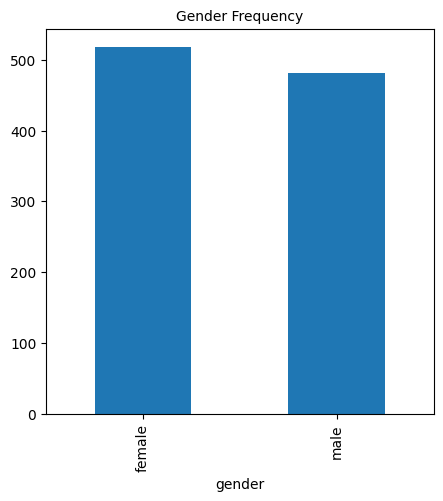

In [17]:
df["gender"].value_counts().plot.bar(figsize=(5,5))
plt.title("Gender Frequency",fontsize=10)
plt.show()

In [18]:
df["parental_level_of_education"].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

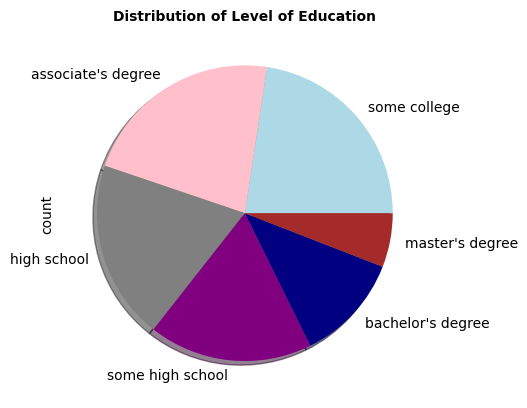

<Figure size 1000x500 with 0 Axes>

In [19]:
data=df["parental_level_of_education"].value_counts()
colors=('lightblue','pink','gray','purple','navy','brown')
data.plot(kind='pie', colors=colors, shadow=True)
plt.title("Distribution of Level of Education", loc='center',color='Black', fontsize=10, fontweight='bold')
fig= plt.figure(figsize=(10,5))
plt.show()

In [20]:
df["race_ethnicity"].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

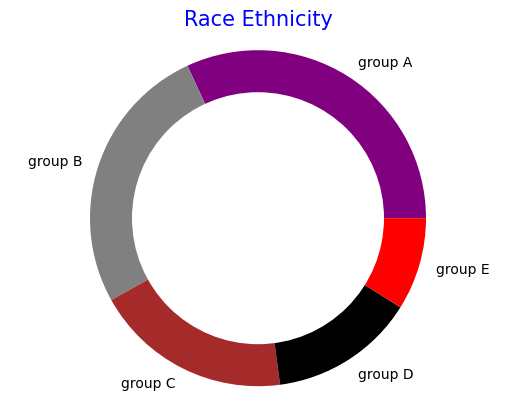

In [21]:
df["race_ethnicity"].value_counts()
labels=['group A', 'group B', 'group C', 'group D', 'group E']
colors=['purple','gray','brown','black','Red']
plt.pie(df["race_ethnicity"].value_counts(), labels=labels, colors=colors)
plt.axis('equal')
plt.title("Race Ethnicity", loc='center', color='Blue', fontsize='15')
plt.gca().add_artist(plt.Circle(xy=(0,0),radius=0.75, facecolor='white'))
plt.show()

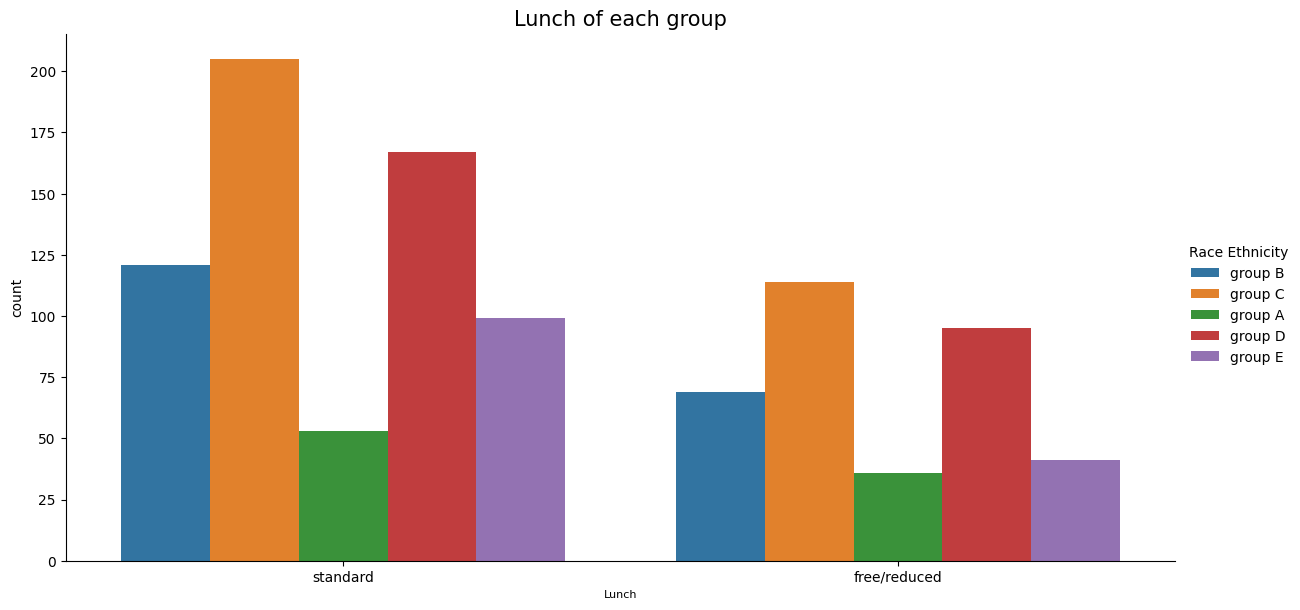

In [22]:
ax = sns.catplot(kind='count', data=df, x='lunch', hue='race_ethnicity',height=6, aspect=2 )
ax.set_xlabels('Lunch', fontsize=8)
ax.legend.set_title('Race Ethnicity')
plt.title('Lunch of each group',fontsize=15)
plt.show()

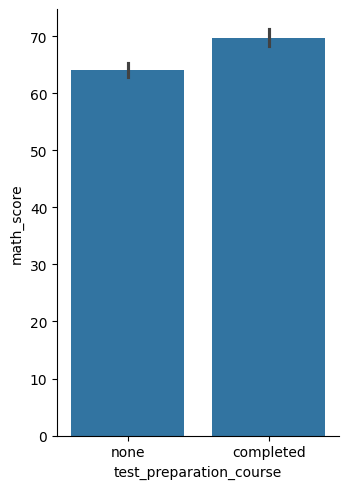

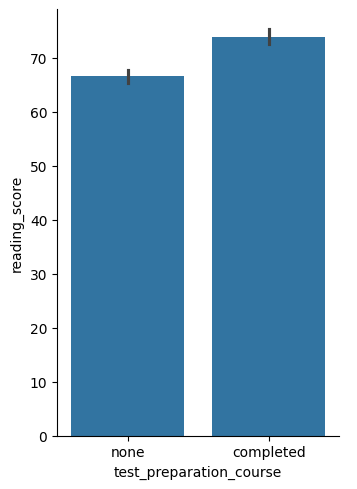

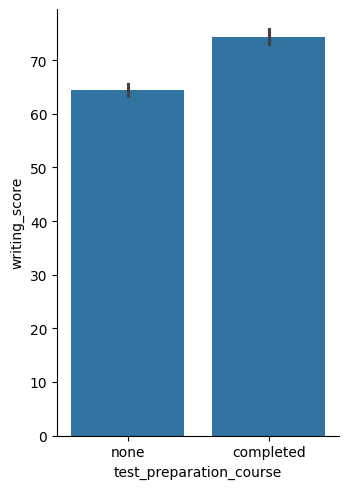

In [23]:
t1 = sns.catplot(data=df, x="test_preparation_course", y="math_score",kind="bar", height=5, aspect=.7)
t2 = sns.catplot(data=df, x="test_preparation_course", y="reading_score",kind="bar", height=5, aspect=.7)
t3 = sns.catplot(data=df, x="test_preparation_course", y="writing_score",kind="bar", height=5, aspect=.7)
plt.show()